<center><h1>BMIF804</h1>
    <h2>Assignment 2</h2>  
    <h3>By: Hannah Driver (10090525)</h3> </center>

<b>This program ...</b>

In [67]:
# import libraries
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

<h2>Data Preparation</h2>

In [68]:
def readImage(imageName):
    """
    Read in file to create image object
    :param imageName: name of the file to read in
    :return: image object
    """
    img = sitk.ReadImage(imageName)
    return img

In [69]:
#Specify image to read and name it
img = readImage('intraop_mri_new.nrrd')
img_name = "Intraoperative MRI"

In [70]:
img = sitk.Cast(img, sitk.sitkFloat32)

In [71]:
#Set up the 3D Slicer external viewr
external_viewer = sitk.ImageViewer()
slicer_app_location = "C:\\Program Files\\Slicer 4.8.1\\Slicer.exe"
external_viewer.SetApplication(slicer_app_location)

<h2>Part 1</h2>

In [72]:
def image_Info(img,imageName):
    """
    Print important attributes of inputted image, including: size, spacing, origin, direction, and pixel type
    :param img: image object
    :param imageName: user-specified name of image object
    :return: print statement with important attributes from image
    """
    # Get important attributes
    size = img.GetSize() # get size
    spacing = img.GetSpacing() # get spacing
    origin = img.GetOrigin() # get origin
    direction = img.GetDirection() # get direction
    pixel_type = img.GetPixelIDTypeAsString() # get pixel type
    
    # Return the printed attributes
    attributes = print("For image: {}\nThe size is: {}\nThe spacing is: {}\nThe origin is: {}\nThe direction is: {}\nThe pxiel type is: {}\n"
                       .format(imageName,size,spacing,origin,direction,pixel_type))
    return attributes

In [137]:
def imageDimensions(img,imageName):
    """
    
    :param : 
    :param : 
    :return: 
    """
    #Get image info
    size = img.GetSize() 
    spacing = img.GetSpacing() 
    #origin = img.GetOrigin()
    
    #Calculate image dimensions 
    dim1 = size[0]*spacing[0]
    dim2 = size[1]*spacing[1]
    dim3 = size[2]*spacing[2]

    print("The physical extent of {} is: {} mm x {} mm x {} mm.".format(imageName,dim1,dim2,dim3))

In [113]:
def data_resample(image,new_spacing):
    
    #Get image info
    size = img.GetSize() 
    spacing = img.GetSpacing() 
    origin = img.GetOrigin()
    
    #Calculate image dimensions 
    dim1 = int(size[0]*spacing[0] / new_spacing[0])
    dim2 = int(size[1]*spacing[1] / new_spacing[1])
    dim3 = int(size[2]*spacing[2] / new_spacing[2])
    output_size = [dim1,dim2,dim3]
    
    #resample image
    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(new_spacing)
    resample.SetSize(output_size)
    resample.SetOutputOrigin(origin)
    resample.SetTransform(sitk.Transform())
    img_resampled = resample.Execute(image)
    
    return img_resampled    

<h5>Part 1a</h5>

In [74]:
#Print important attributes for the image
image_Info(img, img_name)

For image: Intraoperative MRI
The size is: (140, 280, 45)
The spacing is: (2.0, 1.0, 4.0)
The origin is: (-140.0, -139.5, -90.0)
The direction is: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
The pxiel type is: 32-bit float



In [ ]:
#View image in 3D Slicer
external_viewer.Execute(img)

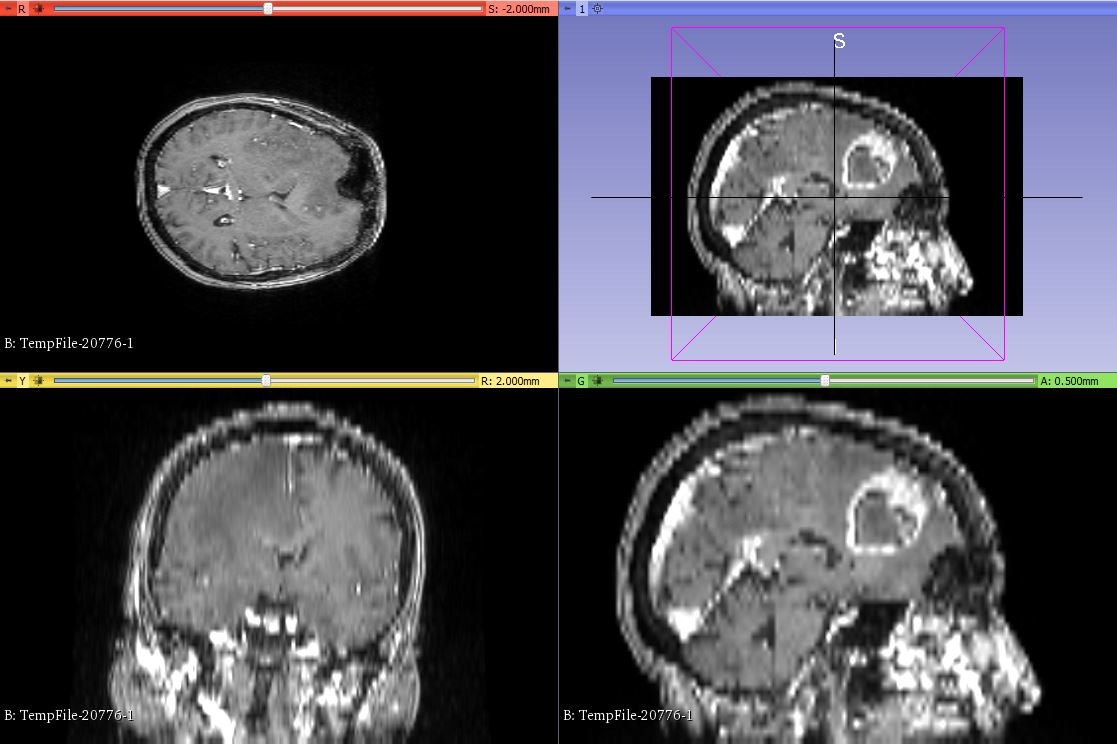

<h5>Part 1b</h5>

In [136]:
#Calculate physical extent of image using sitk spacing, size, and origin functions 
imageDimensions(img, img_name)

#Calculate physical extent of image using TransformIndexToPhysicalPoint function

size = img.GetSize() 
spacing = img.GetSpacing() 
origin = img.GetOrigin()

point1 = int(size[0]*spacing[0]+origin[0])
point2 = int(size[1]*spacing[1]+origin[1])
point3 = int(size[2]*spacing[2]+origin[2])

dims = img.TransformIndexToPhysicalPoint((point1,point2,point3))
print("The physical extent of {} is: {}.".format(img_name, dims))

The dimensions of Intraoperative MRI are: 280.0 mm x 280.0 mm x 180.0 mm.
The dimensions of Intraoperative MRI are: (140.0, 0.5, 270.0).


Why is there a difference above? *********************************

<h5>Part 1c</h5>

For the original image, the metadata are as follows:
The size is: (140, 280, 45)
The spacing is: (2.0, 1.0, 4.0)
The origin is: (-140.0, -139.5, -90.0)
The direction is: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
The pxiel type is: 32-bit float

By changing the voxel size to 0.5 x 0.5 x 0.5, the spacing of the resampled image will change to 0.5, 0.5, 0.5. This in turn will change the size of the image, as each voxel was larger in the original image. Therefore, the size of the new image will be: (140*2/0.5), (280*1/0.5), (45*4/0.5). The origin of the image will remain the same as I will set it to be the same as the original image. The image itself isn't changing, I am just reducing the size of each individual voxel, therefore, the direction and pixel type should remain the same as the original image.

Thus, the dimensions of the new image should be as follows:
The size is: (560, 560, 360)
The spacing is: (0.5, 0.5, 0.5)
The origin is: (-140.0, -139.5, -90.0)
The direction is: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
The pxiel type is: 32-bit float

<h5>Part 1d</h5>

In [114]:
new_spacing = (0.5,0.5,0.5)

img_resampled = data_resample(img,new_spacing)

#View image in 3D Slicer
external_viewer.Execute(img_resampled)

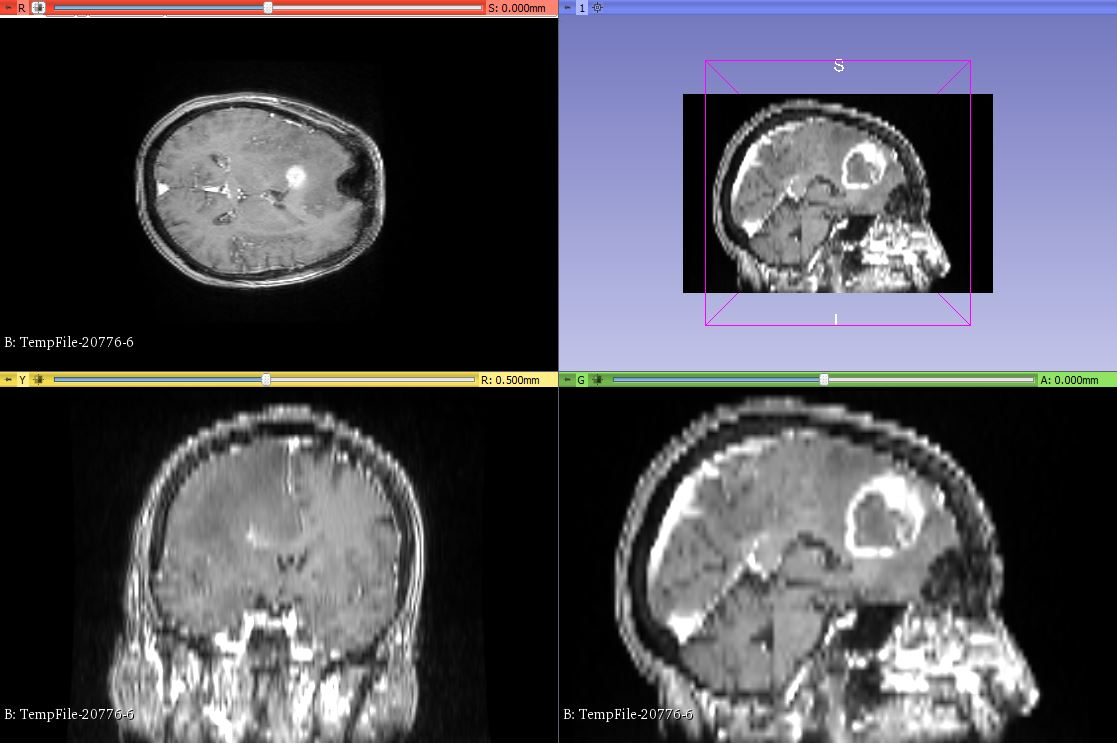

<h5>Part 1e</h5>

In [115]:
resampled_img_name = "Resampled Intraoperative MRI"
image_Info(img_resampled, resampled_img_name)

For image: Resampled Intraoperative MRI
The size is: (560, 560, 360)
The spacing is: (0.5, 0.5, 0.5)
The origin is: (-140.0, -139.5, -90.0)
The direction is: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
The pxiel type is: 32-bit float



The metadata for the resampled image match with what was predicted in part 1c.

<h2>Part 2</h2>

In [149]:
def rotateImage(image,angle):
    """
    Rotate an image
    :param image: image object to transform
    :param angle: angle to rotate image by
    :return: transformed image object
    """
    
    theta = np.deg2rad(angle)
    
    size = img.GetSize() 
    spacing = img.GetSpacing()
    origin = img.GetOrigin()
    
    cent1 = spacing[0] * size[0]/2 + origin[0]
    cent2 = spacing[1] * size[1]/2 + origin[1]
    cent3 = spacing[2] * size[2]/2 + origin[2]
    
    transform = sitk.Euler3DTransform()
    transform.SetRotation(0,0,theta)
    transform.SetCenter((cent1,cent2,cent3))
    
    img_rotated = sitk.Resample(image,image,transform,sitk.sitkLinear)
    return img_rotated

In [155]:
def translateImage(image):
    
    spacing = image.GetSpacing()
    
    #10 mm to R, P, and S
    Rcoord = -10/spacing[0] #determine number of pixels to move toward R
    Pcoord = 10/spacing[1] #determine number of pixels to move toward P
    Scoord = 10/spacing[2] #determine number of pixels to move toward S
    
    transform = sitk.Euler3DTransform()
    transform.SetTranslation((Rcoord,Pcoord,Scoord))
    
    img_translated = sitk.Resample(image,image,transform,sitk.sitkLinear)
    return img_translated

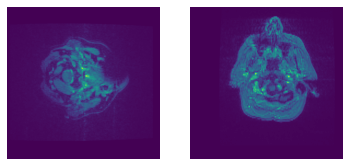

In [159]:
#Rotate image
angle = 90
img_rotated = rotateImage(img_resampled,angle)

#Tranlate image
img_translated = translateImage(img_rotated)

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img_resampled[:,:,0]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_translated[:,:,0]))
plt.axis('off')
plt.show()

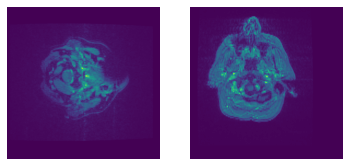

In [160]:
#Translate image
img_translated2 = translateImage(img_resampled)

#Rotate image
angle = 90
img_rotated2 = rotateImage(img_translated2,angle)

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img_resampled[:,:,0]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_rotated2[:,:,0]))
plt.axis('off')
plt.show()